## Review Pandas 🐼

In [91]:
import pandas as pd

In [92]:
from ipywidgets import interact
# Define the question and check function
def quiz(answer):
    # Print the question
    print("A pandas Series is a multi-dimensional array holding data of a single type. (True/False):")
    # Check the answer
    if answer == "False":
        return "Correct! A Pandas Series is like a column in a table. It is a one-dimensional array holding data of any type."
    else:
        return "Incorrect."
# Use interact to create a dropdown for True/False
interact(quiz, answer=["True", "False"]);

interactive(children=(Dropdown(description='answer', options=('True', 'False'), value='True'), Output()), _dom…

In [93]:
'''
Given a Pandas DataFrame, how would you get the weekday names
'''
data = {
    'date': ['2018-03-04', '2018-03-05', '2018-03-06', '2018-04-01', '2018-04-02'],
    'weather': ['cloudy', 'sunny', 'rain', 'snow', 'sunny'],
    'temperature': [12, 15, 8, -2, 10],
    'humidity': [80, 40, 90, 60, 50]
}
# Convert dictionary to DataFrame
df = pd.DataFrame(data)
print(df)

         date weather  temperature  humidity
0  2018-03-04  cloudy           12        80
1  2018-03-05   sunny           15        40
2  2018-03-06    rain            8        90
3  2018-04-01    snow           -2        60
4  2018-04-02   sunny           10        50


In [94]:
#The dataframe has the following shape (a tuple (rows,columns))
df.shape

(5, 4)

In [5]:
df.describe()

,temperature,humidity
count,5.000000,5.000000
mean,8.600000,64.000000
std,6.465292,20.736441
min,-2.000000,40.000000
25%,8.000000,50.000000
50%,10.000000,60.000000
75%,12.000000,80.000000
max,15.000000,90.000000


In [6]:
#How would you return the weather and humidity columns 
#for rows where the temperature is greater than 10?
df.loc[df['temperature'] > 10, ['weather', 'humidity']]

,weather,humidity
0,cloudy,80
1,sunny,40


In [7]:
#How would you select the last two rows and the date and temperature columns using negative indexing?
df.iloc[-2:, [0, 2]]

,date,temperature
3,2018-04-01,-2
4,2018-04-02,10


In [8]:
#How would you set the humidity value to 100 for all rows where the weather is "rain"?
df.loc[df['weather'] == 'rain', 'humidity'] = 100
df

,date,weather,temperature,humidity
0,2018-03-04,cloudy,12,80
1,2018-03-05,sunny,15,40
2,2018-03-06,rain,8,100
3,2018-04-01,snow,-2,60
4,2018-04-02,sunny,10,50


In [9]:
#How would you select every other row starting from the second row and display all columns?
df.iloc[1::2]

,date,weather,temperature,humidity
1,2018-03-05,sunny,15,40
3,2018-04-01,snow,-2,60


In [10]:
#How would you reverse both the rows and columns of the DataFrame?
df.iloc[::-1, ::-1]

,humidity,temperature,weather,date
4,50,10,sunny,2018-04-02
3,60,-2,snow,2018-04-01
2,100,8,rain,2018-03-06
1,40,15,sunny,2018-03-05
0,80,12,cloudy,2018-03-04


In [11]:
#How would you set the temperature to 0 for all rows where the humidity is above 50 and the weather is "cloudy" or "snow"?
df.loc[(df['humidity'] > 50) & (df['weather'].isin(['cloudy', 'snow'])), 'temperature'] = 0
df

,date,weather,temperature,humidity
0,2018-03-04,cloudy,0,80
1,2018-03-05,sunny,15,40
2,2018-03-06,rain,8,100
3,2018-04-01,snow,0,60
4,2018-04-02,sunny,10,50


In [12]:
#This will return rows where the temperature is less than 10.
df_sliced = df.loc[lambda x: x['temperature'] < 10]
print(df_sliced)

         date weather  temperature  humidity
0  2018-03-04  cloudy            0        80
2  2018-03-06    rain            8       100
3  2018-04-01    snow            0        60


In [13]:
# Convert 'date' column to datetime
#Converts the date column (which is in string format) into a Pandas datetime object.
df['date'] = pd.to_datetime(df['date'])

# Extract the full weekday name
#This accesses the datetime properties of the date column
#This method returns the full name of the day (e.g., "Sunday", "Monday") for each date in the date column.
df['weekday'] = df['date'].dt.day_name()
df

,date,weather,temperature,humidity,weekday
0,2018-03-04,cloudy,0,80,Sunday
1,2018-03-05,sunny,15,40,Monday
2,2018-03-06,rain,8,100,Tuesday
3,2018-04-01,snow,0,60,Sunday
4,2018-04-02,sunny,10,50,Monday


## MOVIE Rating with Pandas


In [48]:
import numpy as np
import pandas as pd

In [49]:
df = pd.read_csv('/3.0-Review-Pandas-IMDb Movies India.csv', encoding='latin-1')
df.head(3)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana


# Returns size of dataframe? (equivalent to total number of elements/ That is rows x columns)

In [50]:
# You can think of it as multiplying the rows * columns
df.size

155090

# Returns shape of dataframe? (tuple of shape (Rows, columns) of dataframe)

In [51]:
df.shape

(15509, 10)

# YOU noticed that there are NaN values

We have to remove them before we start our analyses

In [52]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [54]:
# We want to keep the only rows that have no missing values
# This mean all the rows has NaN values will be removed
df.dropna(inplace=True)
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [58]:
# WE checked the number of missing values again
# we notice that we have 0 Nan at this stage
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

# We want to compute the annual movie release counts over time based on the Year column in the dataset

In [64]:
# Step 1: Group by 'Year' and count the number of movies released each year
annual_movie_counts = df.groupby('Year').size()
annual_movie_counts

Year
1931      2
1932      1
1933      1
1934      2
1935      5
       ... 
2017    211
2018    202
2019    227
2020    140
2021     63
Length: 91, dtype: int64

In [65]:
annual_movie_counts.values

array([  2,   1,   1,   2,   5,   7,   6,   5,   2,   8,   5,   6,   8,
         4,   3,   6,   6,  10,  13,  18,  15,  16,  20,  19,  25,  21,
        31,  31,  27,  26,  25,  29,  29,  36,  36,  42,  41,  50,  46,
        46,  54,  52,  46,  56,  52,  45,  61,  51,  54,  70,  67,  67,
        61,  67,  83,  73,  51,  67,  88,  73,  72,  86,  85,  78,  64,
        70,  75,  76,  80,  83,  90,  90, 114, 109, 141, 112, 117, 111,
       118, 131, 125, 140, 167, 165, 177, 173, 211, 202, 227, 140,  63])

In [66]:
annual_movie_counts.index

Index([1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype='int64', name='Year')

In [74]:
# We want to find the year with the maximum number of movie releases
max_year = annual_movie_counts.idxmax()  # Year with the maximum movie releases
max_count = annual_movie_counts.max()    # Maximum number of movie releases
print(f"The year with the most movie releases is {max_year} with {max_count} movies.")

The year with the most movie releases is 2019 with 227 movies.


# Plot the Annual Movie Release Counts across years

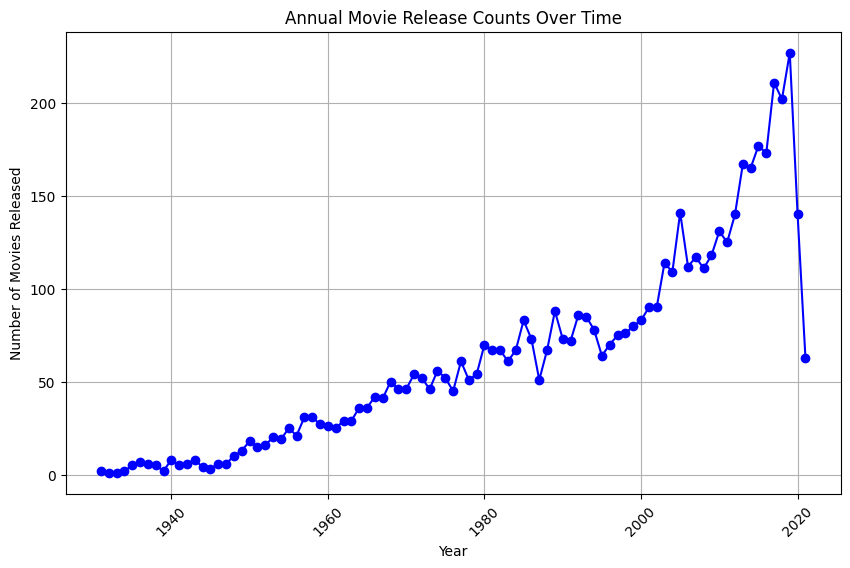

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(annual_movie_counts.index, annual_movie_counts.values, marker='o', linestyle='-', color='b')
plt.title('Annual Movie Release Counts Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Finding the actor who appears most frequently in the movies from the dataset and identifying the titles of those movies (the top five movies)

In [78]:
# Combine all actor columns into a single Series
all_actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']])

# Count occurrences of each actor
actor_counts = all_actors.value_counts()

In [85]:
# Find the actor with the maximum appearances
max_actor = actor_counts.idxmax()
max_count = actor_counts.max()

# Find the movies this actor appeared in (All the movies for this actor)
movies = df[df.isin([max_actor]).any(axis=1)]['Name'].tolist()

movies_for_actor = df[(df['Actor 1'] == max_actor) | (df['Actor 2'] == max_actor) | (df['Actor 3'] == max_actor)]
top_movies = movies_for_actor['Name'].head(5)

In [86]:
# Output the results
print(f"The actor who appears the most is '{max_actor}' with {max_count} appearances.")

The actor who appears the most is 'Mithun Chakraborty' with 160 appearances.


In [87]:
print("The actor has appeared in the following top movies:")
for movie in top_movies:
    print(f"- {movie}")

The actor has appeared in the following top movies:
- 12 O'Clock
- Aadat Se Majboor
- Aaj Ka Ravan
- Aakhri Ghulam
- Aamne Samne
